In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.convolutional import Conv1D
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel("drive/My Drive/Colab Notebooks/data/Data_ML.xlsx")

print(df.isnull().values.any())

print(df.shape)

False
(1989, 154)


In [4]:
df = df.drop('Date',axis=1)

In [ ]:
df.shape

(1989, 153)

In [5]:
df.head()

,Label,sentiment_score,Topic,TextCluster_SVD1,TextCluster_SVD2,TextCluster_SVD3,TextCluster_SVD4,TextCluster_SVD5,TextCluster_SVD6,TextCluster_SVD7,TextCluster_SVD8,TextCluster_SVD9,TextCluster_SVD10,TextCluster_SVD11,TextCluster_SVD12,TextCluster_SVD13,TextCluster_SVD14,TextCluster_SVD15,TextCluster_SVD16,TextCluster_SVD17,TextCluster_SVD18,TextCluster_SVD19,TextCluster_SVD20,TextCluster_SVD21,TextCluster_SVD22,TextCluster_SVD23,TextCluster_SVD24,TextCluster_SVD25,TextCluster_SVD26,TextCluster_SVD27,TextCluster_SVD28,TextCluster_SVD29,TextCluster_SVD30,TextCluster_SVD31,TextCluster_SVD32,TextCluster_SVD33,TextCluster_SVD34,TextCluster_SVD35,TextCluster_SVD36,TextCluster_SVD37,...,TextCluster_SVD111,TextCluster_SVD112,TextCluster_SVD113,TextCluster_SVD114,TextCluster_SVD115,TextCluster_SVD116,TextCluster_SVD117,TextCluster_SVD118,TextCluster_SVD119,TextCluster_SVD120,TextCluster_SVD121,TextCluster_SVD122,TextCluster_SVD123,TextCluster_SVD124,TextCluster_SVD125,TextCluster_SVD126,TextCluster_SVD127,TextCluster_SVD128,TextCluster_SVD129,TextCluster_SVD130,TextCluster_SVD131,TextCluster_SVD132,TextCluster_SVD133,TextCluster_SVD134,TextCluster_SVD135,TextCluster_SVD136,TextCluster_SVD137,TextCluster_SVD138,TextCluster_SVD139,TextCluster_SVD140,TextCluster_SVD141,TextCluster_SVD142,TextCluster_SVD143,TextCluster_SVD144,TextCluster_SVD145,TextCluster_SVD146,TextCluster_SVD147,TextCluster_SVD148,TextCluster_SVD149,TextCluster_SVD150
0,0,0.708408,18,0.070340,-0.053418,0.007628,-0.039590,0.013758,-0.006961,0.003005,-0.009582,0.004257,-0.035629,0.053125,-0.042869,0.056493,-0.045300,0.064174,-0.043070,0.009018,-0.088200,0.029373,-0.060276,0.026729,-0.054988,0.064938,-0.041884,0.037314,-0.049207,0.036609,-0.052739,0.007796,-0.004014,0.046403,-0.029370,0.006170,-0.001426,0.042902,-0.013185,0.087331,...,0.101724,-0.079988,0.021861,-0.226352,0.082787,-0.038550,0.065302,-0.110700,0.072415,-0.135987,0.092684,-0.043056,0.126786,-0.071721,0.243436,-0.006753,0.000322,-0.080022,0.010144,-0.066310,0.363848,-0.097505,0.206657,-0.095168,0.004715,-0.104697,0.100755,-0.074710,0.015919,-0.050645,0.116522,-0.017147,0.039564,-0.061400,0.047492,-0.122964,0.051517,-0.151404,0.119570,-0.008954
1,1,0.982830,12,0.051980,-0.058078,-0.015400,-0.007448,0.046362,0.002541,-0.087866,0.085167,-0.003734,-0.008321,-0.028623,0.040409,-0.004584,-0.000692,-0.002099,-0.024974,0.045334,0.036934,0.021652,0.068953,0.013503,0.053537,-0.094969,-0.001640,0.003632,-0.040337,-0.006653,-0.018416,0.031414,-0.000114,0.004470,-0.005188,0.112886,-0.025753,-0.056319,-0.031808,-0.012579,...,-0.093461,-0.068544,0.034504,-0.028307,-0.095676,0.104153,-0.095475,-0.020406,-0.054456,0.076732,-0.087010,-0.090862,-0.043874,-0.017090,0.012035,0.090027,0.024193,-0.079964,0.101046,-0.015903,-0.136454,-0.087935,-0.034662,0.011328,0.043837,-0.163852,0.052653,0.016805,-0.126830,0.051297,0.195758,-0.130426,0.034301,-0.017566,-0.027512,-0.005659,0.008784,-0.060372,0.034575,0.116155
2,0,0.935311,12,0.189981,-0.047806,0.068441,-0.014393,-0.006442,-0.066779,-0.037231,-0.009753,0.035989,-0.205988,0.049160,0.169126,0.065916,-0.004228,-0.018234,-0.081065,-0.006108,-0.037406,-0.086733,-0.015370,-0.040718,-0.031523,-0.048353,0.040183,0.096255,-0.021080,0.008966,-0.014644,-0.067264,-0.025443,0.009030,-0.051706,0.070022,0.048911,-0.006165,0.111213,0.110574,...,0.104727,-0.061049,-0.013598,-0.042812,-0.122341,-0.083730,-0.091760,-0.042137,0.051752,-0.001305,0.055347,-0.020711,0.100515,-0.045093,-0.132599,0.084397,0.060316,-0.027973,-0.049351,0.163951,0.083682,-0.118854,-0.036862,-0.109198,0.034062,-0.047079,-0.051648,0.139000,-0.036143,-0.037677,-0.017577,0.127634,-0.116772,-0.006697,-0.100506,0.192060,-0.014918,-0.090984,-0.045369,0.048514
3,0,0.721639,12,0.024444,-0.021404,-0.011992,-0.000998,-0.006536,-0.001816,0.003279,-0.001552,0.007169,-0.028825,0.007590,-0.007292,0.017969,-0.006556,-0.011123,-0.019713,-0.004456,0.006827,0.014983,0.008799,0.006653,-0.021051,-0.013802,0.017766,0.022354,-0.007974,-0.002394,-0.

#Data Partitioning

In [6]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [7]:
y = df.pop('Label')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2,
                                                    random_state=42)

In [9]:
X_train=tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [10]:
X=tf.convert_to_tensor(df)
y=tf.convert_to_tensor(y)

#Simple DNN


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, batch_size=128, epochs=6, verbose=2, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/6
13/13 - 0s - loss: 0.4979 - accuracy: 0.7618 - val_loss: 0.5015 - val_accuracy: 0.7513
Epoch 2/6
13/13 - 0s - loss: 0.4902 - accuracy: 0.7649 - val_loss: 0.5025 - val_accuracy: 0.7487
Epoch 3/6
13/13 - 0s - loss: 0.4832 - accuracy: 0.7718 - val_loss: 0.5056 - val_accuracy: 0.7487
Epoch 4/6
13/13 - 0s - loss: 0.4755 - accuracy: 0.7775 - val_loss: 0.5068 - val_accuracy: 0.7412
Epoch 5/6
13/13 - 0s - loss: 0.4693 - accuracy: 0.7819 - val_loss: 0.5090 - val_accuracy: 0.7462
Epoch 6/6
13/13 - 0s - loss: 0.4631 - accuracy: 0.7888 - val_loss: 0.5095 - val_accuracy: 0.7412
13/13 - 0s - loss: 0.6620 - accuracy: 0.6055


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6619732975959778
Test Accuracy: 0.6055276393890381


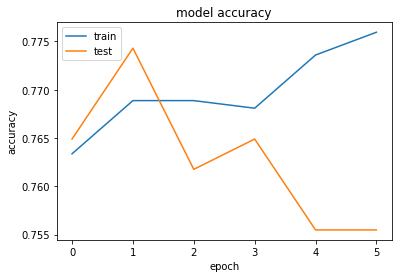

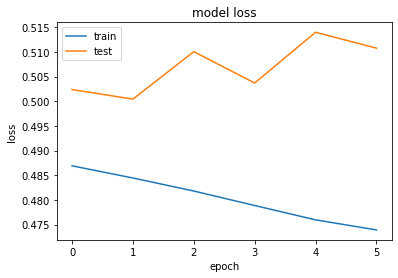

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

#Simple CNN 

In [ ]:
#CNN 1Dx2
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(128, 5, activation='relu', input_shape=(152, 1)),
      tf.keras.layers.MaxPooling1D(2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Conv1D(64, 5, activation='relu'),
      tf.keras.layers.MaxPooling1D(2,2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 1587, 128)         97408     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 793, 128)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 793, 128)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 789, 64)           41024     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 394, 64)           0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 394, 64)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 25216)            

In [ ]:
X_train = tf.reshape(X_train, [1591,152, 1])
X_test = tf.reshape(X_test, [398,152, 1])

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
10/10 [==============================] - 0s 6ms/step - loss: 0.3980 - accuracy: 0.8341 - val_loss: 0.5117 - val_accuracy: 0.7492
Epoch 2/6
10/10 [==============================] - 0s 4ms/step - loss: 0.3944 - accuracy: 0.8412 - val_loss: 0.5213 - val_accuracy: 0.7367
Epoch 3/6
10/10 [==============================] - 0s 3ms/step - loss: 0.3909 - accuracy: 0.8341 - val_loss: 0.5133 - val_accuracy: 0.7586
Epoch 4/6
10/10 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8475 - val_loss: 0.5307 - val_accuracy: 0.7304
Epoch 5/6
10/10 [==============================] - 0s 3ms/step - loss: 0.3847 - accuracy: 0.8506 - val_loss: 0.5332 - val_accuracy: 0.7304
Epoch 6/6
13/13 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5980


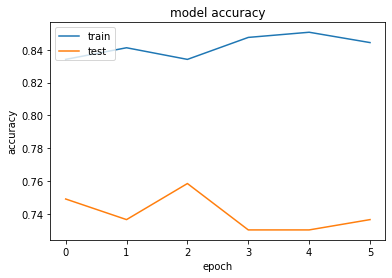

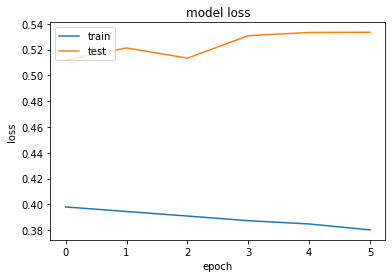

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

#LSTM

In [ ]:
# LSTM 
model2 = tf.keras.models.Sequential([
      tf.keras.layers.LSTM(128, activation='relu', input_shape=(1591,152)),
      tf.keras.layers.Dropout(0.1),
      #tf.keras.layers.LSTM(128, activation='relu'),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model2.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               143872    
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 65        
Total params: 168,705
Trainable params: 168,705
Non-trainable params: 0
_______________________________________________

In [ ]:
X_train = tf.reshape(X_train, [1591,1, 152])
X_test = tf.reshape(X_test, [398,1, 152])

In [ ]:
history = model2.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model2.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
 2/10 [=====>........................] - ETA: 0s - loss: 0.6900 - acc: 0.5664

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


10/10 [==============================] - 1s 61ms/step - loss: 0.6911 - acc: 0.5432 - val_loss: 0.7065 - val_acc: 0.4577
Epoch 2/6
10/10 [==============================] - 1s 59ms/step - loss: 0.6893 - acc: 0.5440 - val_loss: 0.7003 - val_acc: 0.4577
Epoch 3/6
10/10 [==============================] - 1s 60ms/step - loss: 0.6876 - acc: 0.5440 - val_loss: 0.7079 - val_acc: 0.4577
Epoch 4/6
10/10 [==============================] - 1s 56ms/step - loss: 0.6840 - acc: 0.5440 - val_loss: 0.7012 - val_acc: 0.4577
Epoch 5/6
10/10 [==============================] - 1s 55ms/step - loss: 0.6812 - acc: 0.5472 - val_loss: 0.6987 - val_acc: 0.4545
Epoch 6/6
13/13 [==============================] - 0s 9ms/step - loss: 0.6816 - acc: 0.5729


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6816323399543762
Test Accuracy: 0.572864294052124


In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


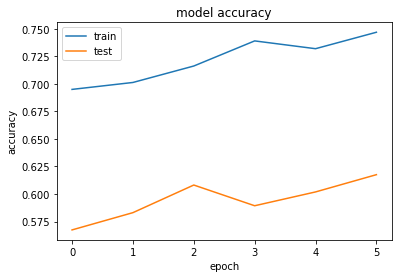

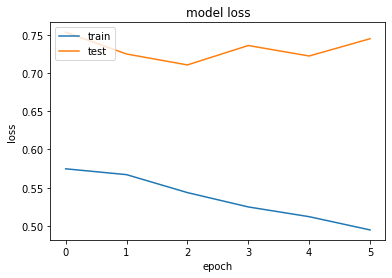

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()